<h1>Projeto 3 - "Montanha-Russa"</h1>

Marcelo Lisboa de Castro Reis e Rogério Ferrari - 
1C

**Sistema Físico:**

<img src="sistFis3.png"/, width=400, height=300 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 1: Sistema mecânico da montanha russa dividido em duas partes: a rampa e o looping

**Diagramas de Corpo Livre e Eixo de Coordenadas:**

<img src="eixocordenadas.png"/, width=400, height=300 style="float: center; margin: 0px 0px 10px 10px">  
Figura 2: Diagrama de Corpo Livre da rampa e do looping com as forças atuantes e o eixo de coordenadas 


**Equações Diferenciais:**

1) Rampa:

$\Large{\frac{d_2Xr}{dt_2}=\frac{1}{m} \cdot [{F}_{at^x} + {F}_{Rar^x} - {N}_{x}] }$

$\Large{\frac{d_2Yr}{dt_2}=\frac{1}{m} \cdot [{F}_{at^y} + {F}_{Rar^y} + {N}_{y}] - {g} }$

2) Looping:

$\Large{\frac{d_2Xl}{dt_2}=\frac{1}{m} \cdot [- {F}_{at^x} - {F}_{Rar^x} - {N}_{x}] }$

$\Large{\frac{d_2Yl}{dt_2}=\frac{1}{m} \cdot [{F}_{at^y} + {F}_{Rar^y} - {N}_{y}] - {g} }$


**Simplificações:**

- Nosso sistema considera apenas o mi dinâmico, desconsideramos situações em que carrinho não se desloca por causa do mi estático
- Pelo nosso modelo vamos saber se o carrinho cairia se a normal fosse negativa

## Primeira parte - Rampa ##

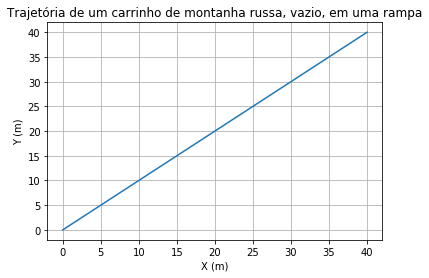

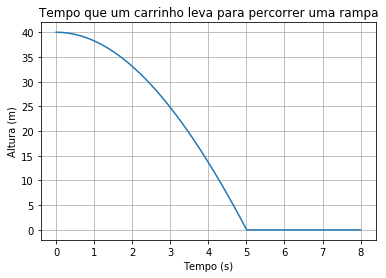

In [2]:
## Proejto 3 - Montanha Russa

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

#RAMPA

#Parâmetros:
pho = 1.2754 #Kg/m3
Cd = 1.05
A = 2.5*1.5 #(Largura*altura) #m2
mi = 0.3
g = 10 #m/s
m = 500 #kg
ang = math.radians(45)

#Função Equação Diferencial:
def EqDifRampa (listasolucoes, t, m, angulo):
    x = listasolucoes[0]
    y = listasolucoes[1]
    vx = listasolucoes[2]
    vy = listasolucoes[3]
    #Forças    
    N = m*g*math.cos(angulo)
    Fatx = mi*N*math.cos(angulo)
    Faty = mi*N*math.sin(angulo)
    FRarx = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vx/math.sqrt(vx**2+vy**2))
    FRary = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vy/math.sqrt(vx**2+vy**2))
    Nx = N*math.sin(angulo)
    Ny = N*math.cos(angulo)
    P = m*g
    #Equações
    dxdt = vx
    dydt = vy
    dvxdt = (1/m)*(Fatx+FRarx-Nx)
    dvydt = (1/m)*(Faty+FRary+Ny-P)
    #Se o carrinho chegar à altura mínima, ele vai parar e não vai afundar
    if y<=0:
        dxdt = 0
        dvxdt = 0#
        dydt = 0
        dvydt = 0#
    return [dxdt, dydt, dvxdt, dvydt]

#Condições Iniciais:
v0 = 0.01 #m/s
comprimento=40
altura=math.tan(ang)*comprimento
CI = [comprimento, altura, -math.cos(ang)*v0, - math.sin(ang)*v0]
#print(CI)

#Lista tempo:
delta_t = 1e-3
tempo = np.arange(0,8,delta_t) #5,delta_t) #

#Solução e Gráficos:
solucao_rampa = odeint(EqDifRampa, CI, tempo, args=(m, ang))

plt.plot(solucao_rampa[:,0], solucao_rampa[:,1])
plt.title('Trajetória de um carrinho de montanha russa, vazio, em uma rampa')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

plt.plot(tempo, solucao_rampa[:,1])
plt.title('Tempo que um carrinho leva para percorrer uma rampa')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

In [3]:
def EqDifRampa_semFatRar (listasolucoes, t, m, angulo):
    x = listasolucoes[0]
    y = listasolucoes[1]
    vx = listasolucoes[2]
    vy = listasolucoes[3]
    #Forças    
    N = m*g*math.cos(angulo)
    Fatx = mi*N*math.cos(angulo)*0
    Faty = mi*N*math.sin(angulo)*0
    FRarx = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vx/math.sqrt(vx**2+vy**2))*0
    FRary = (1/2)*pho*Cd*A*(vx**2+vy**2)*(-vy/math.sqrt(vx**2+vy**2))*0
    Nx = N*math.sin(angulo)
    Ny = N*math.cos(angulo)
    P = m*g
    #Equações
    dxdt = vx
    dydt = vy
    dvxdt = (1/m)*(Fatx+FRarx-Nx)
    dvydt = (1/m)*(Faty+FRary+Ny-P)
    #Se o carrinho chegar à altura mínima, ele vai parar e não vai afundar
    if y<=0:
        dxdt = 0
        dvxdt = 0######
        dydt = 0
        dvydt = 0######
    return [dxdt, dydt, dvxdt, dvydt]

#Solução e Gráficos:
solucao_rampa_semFatRar = odeint(EqDifRampa_semFatRar, CI, tempo, args=(m, ang))

Utilizamos a lei da conservação de energia para validar o nosso modelo e desconsideramos o atrito e a força de resistência do ar porque ambos dissipam energia e não há fórmulas para representá-los. Abaixo segue um gráfico com as energias inseridas e relacionadas com a primeira parte do sistema (rampa):

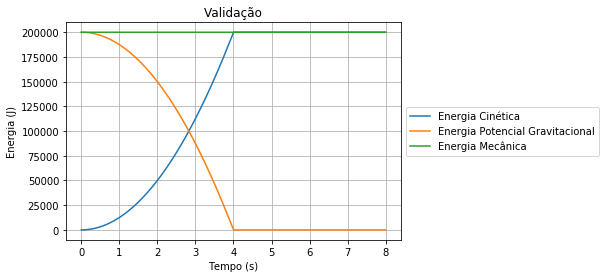

In [4]:
energia_cinetica = []
ep_gravitacional =  []
energia_total = []

for i in range (0, len(tempo)):    
    x=solucao_rampa_semFatRar[:,0][i]
    y=solucao_rampa_semFatRar[:,1][i]
    vx=solucao_rampa_semFatRar[:,2][i]
    vy=solucao_rampa_semFatRar[:,3][i]
    v = math.sqrt(vx**2+vy**2)
    cinetica = ((m*v**2)/2)
    potgrav = (m*g*y)
    energia_cinetica.append(cinetica)
    ep_gravitacional.append(potgrav)
    energia_total.append(cinetica+potgrav)
    
plt.plot(tempo, energia_cinetica, label='Energia Cinética')
plt.plot(tempo, ep_gravitacional, label= 'Energia Potencial Gravitacional')
plt.plot(tempo, energia_total, label = 'Energia Mecânica')
plt.title("Validação")
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## Iterações: ##

Resolvemos variar os ângulos e consequentemente o comprimento da rampa para ver o que aconteceria:

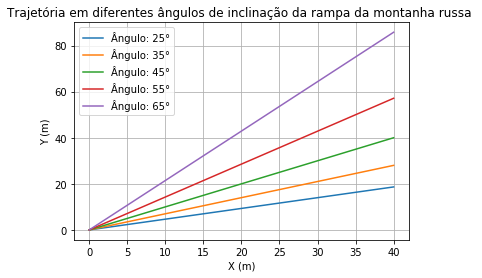

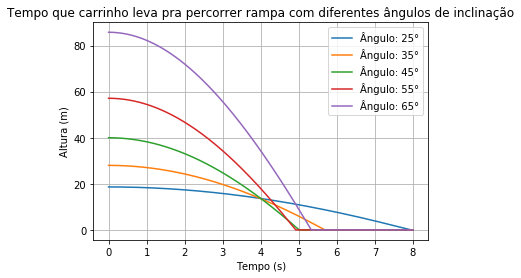

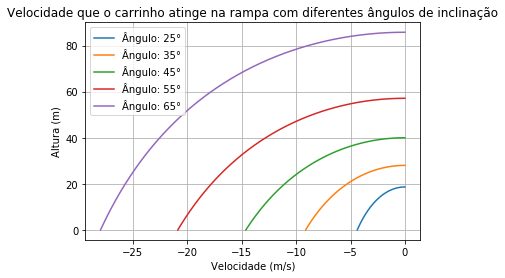

In [5]:
listaInclinacao = [math.radians(25),math.radians(35),math.radians(45),math.radians(55),math.radians(65)]
Angulos = ["Ângulo: 25°","Ângulo: 35°","Ângulo: 45°","Ângulo: 55°","Ângulo: 65°"]

for i, ang in enumerate(listaInclinacao):
    alturanova=math.tan(ang)*comprimento
    CI3 = [comprimento, alturanova, - math.cos(ang)*v0, - math.sin(ang)*v0]
    sol2 = odeint(EqDifRampa, CI3, tempo, args=(m, ang))
    plt.plot(sol2[:,0], sol2[:,1], label=Angulos[i])
    
plt.title('Trajetória em diferentes ângulos de inclinação da rampa da montanha russa ')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.legend()
plt.show()

for i, ang in enumerate(listaInclinacao):
    alturanova=math.tan(ang)*comprimento
    CI3 = [comprimento, alturanova, - math.cos(ang)*v0, - math.sin(ang)*v0]
    #print(CI3)
    sol2 = odeint(EqDifRampa, CI3, tempo, args=(m, ang))
    plt.plot(tempo, sol2[:,1], label=Angulos[i])

plt.title('Tempo que carrinho leva pra percorrer rampa com diferentes ângulos de inclinação')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.legend()
plt.show()

for i, ang in enumerate(listaInclinacao):
    alturanova=math.tan(ang)*comprimento
    CI3 = [comprimento, alturanova, - math.cos(ang)*v0, - math.sin(ang)*v0]
    sol2 = odeint(EqDifRampa, CI3, tempo, args=(m, ang))
    plt.plot(sol2[:,3], sol2[:,1], label=Angulos[i])

plt.title('Velocidade que o carrinho atinge na rampa com diferentes ângulos de inclinação')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.legend()
plt.show()

Assim, baseados nas análises de sensibilidade anteriores da rampa, resolvemos descobrir quanto tempo leva e qual a velocidade do carrinho para que este atinja uma altura de 5 metros. Para isso, observamos o resultado da variação do ângulo de inclinação da rampa e plotamos os respectivos gráficos:

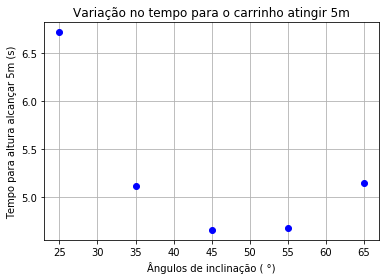

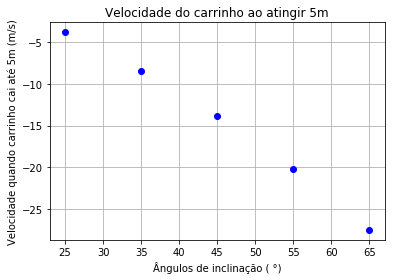

In [6]:
listaangs = [25,35,45,55,65]

def altura_ate_5m (listaTempo, solucao):
    altura5m=1000
    for i, taxa in enumerate(solucao):
        if taxa <= 5:
            altura5m=listaTempo[i]
            break
    return altura5m

listaAltura5m = []

def velocidade_ate_5m (sol1, sol2):
    Velocidade5m=1000
    for i, alt in enumerate(sol2):
        if alt <= 5:
            Velocidade5m=sol1[i]
            break
    return Velocidade5m

listaVelo5m = []

#-------//--------
    
for ang in listaInclinacao:
    alturanova = math.tan(ang)*comprimento
    CIgc = [comprimento, alturanova, - math.cos(ang)*v0, - math.sin(ang)*v0]
    sol_gc = odeint(EqDifRampa, CIgc, tempo, args=(m, ang))
    alt = sol_gc[:,1]
    listaAltura5m.append(altura_ate_5m(tempo, alt))    
#print("Lista de Tempo: {}".format(listaAltura5m))
    
plt.plot(listaangs, listaAltura5m, "bo")
plt.title("Variação no tempo para o carrinho atingir 5m")
plt.xlabel("Ângulos de inclinação ( °)")
plt.ylabel("Tempo para altura alcançar 5m (s)")
plt.grid(True)
plt.show()
    
for ang in listaInclinacao:
    alturanova = math.tan(ang)*comprimento
    CIgc = [comprimento, alturanova, - math.cos(ang)*v0, - math.sin(ang)*v0]
    sol_gc = odeint(EqDifRampa, CIgc, tempo, args=(m, ang))
    velo = sol_gc[:,3]
    alt = sol_gc[:,1]
    listaVelo5m.append(velocidade_ate_5m(velo, alt)) 
#print("Lista de Velocidades: {}".format(listaVelo5m))
    
plt.plot( listaangs, listaVelo5m,  "bo")
plt.title("Velocidade do carrinho ao atingir 5m")
plt.xlabel("Ângulos de inclinação ( °)")
plt.ylabel("Velocidade quando carrinho cai até 5m (m/s)")
plt.grid(True)
plt.show()

Depois de variar os ângulos de inclinação da rampa, resolvemos variar a massa do carrinho adicionando passageiros e ver se alteraria algo:

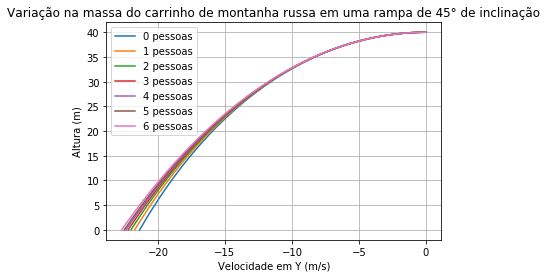

In [7]:
ListaMassas = [500,600,700,800,900,1000,1200] #aprox 120 kg por pessoa
numeroPessoas = np.arange(0,7,1)   

#rint('Massas: {} em kg'.format(ListaMassas))
    
for i in range(0,len(ListaMassas)):
    sol = odeint(EqDifRampa, CI, tempo, args=(ListaMassas[i], ang))
    plt.plot(sol[:,3], sol[:,1], label="%.f pessoas" %numeroPessoas[i])

plt.title('Variação na massa do carrinho de montanha russa em uma rampa de 45° de inclinação')
plt.ylabel('Altura (m)')
plt.xlabel('Velocidade em Y (m/s)')
plt.grid(True)
plt.legend()
plt.show()

Assim como no caso da variação dos ângulos, fizemos a mesma coisa com a análise de sensibilidade das massas. Abaixo segue o gráfico conclusivo no qual também analisamos a velocidade do carrinho para que este atinja uma altura de 5 metros.

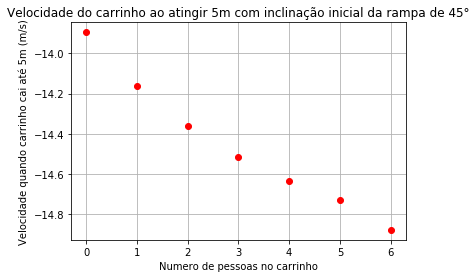

In [9]:
def velocidade_ate_5m_massa (sol1, sol2):
    Velocidade5m=1000
    for i, alt in enumerate(sol2):
        if alt <= 5:
            Velocidade5m=sol1[i]
            break
    return Velocidade5m

listaVelo5m_massa = []
    
for m in ListaMassas:
    sol_massa = odeint(EqDifRampa, CI, tempo, args=(m, math.radians(45)))
    velo = sol_massa[:,3]
    alt = sol_massa[:,1]
    listaVelo5m_massa.append(velocidade_ate_5m(velo, alt)) 
#print("Lista de Velocidades: {}".format(listaVelo5m))
    
plt.plot(numeroPessoas, listaVelo5m_massa,  "ro")
plt.title("Velocidade do carrinho ao atingir 5m com inclinação inicial da rampa de 45°")
plt.xlabel("Numero de pessoas no carrinho")
plt.ylabel("Velocidade quando carrinho cai até 5m (m/s)")
plt.grid(True)
plt.show()

**- A segunda parte do projeto (loop) segue no arquivo "P3-parte2"! **